# Evaluating Machine Learning Models

## Unsupervised learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [2]:
ptype_smaller = "../0_data/ptype_data_workshop.parquet"

In [3]:
f = pd.read_parquet(ptype_smaller)

We start with the p-type dataset and perform clustering on some of temperature levels (spaced every 250 m)

In [4]:
f[[f"TEMP_C_{k}_m" for k in range(0, 5250, 250)]]

,TEMP_C_0_m,TEMP_C_250_m,TEMP_C_500_m,TEMP_C_750_m,TEMP_C_1000_m,TEMP_C_1250_m,TEMP_C_1500_m,TEMP_C_1750_m,TEMP_C_2000_m,TEMP_C_2250_m,...,TEMP_C_2750_m,TEMP_C_3000_m,TEMP_C_3250_m,TEMP_C_3500_m,TEMP_C_3750_m,TEMP_C_4000_m,TEMP_C_4250_m,TEMP_C_4500_m,TEMP_C_4750_m,TEMP_C_5000_m
4,23.792603,24.434848,23.063671,21.466505,19.858570,18.084120,16.379408,14.745566,13.005380,11.366903,...,8.503096,7.235572,5.938518,4.638183,3.359714,2.075303,0.746365,-0.576669,-1.827423,-2.896143
244,24.692841,23.404617,21.572288,19.692281,17.704285,15.528570,13.295979,10.976451,8.600362,6.223896,...,1.736540,-0.256137,-2.182037,-4.085672,-5.994710,-7.916091,-9.705807,-11.567805,-13.413783,-15.177923
296,19.856262,18.168380,17.191451,16.277123,15.205750,13.871668,12.423215,11.066329,9.777620,8.329489,...,4.731808,2.867760,1.315763,-0.064948,-1.159546,-2.243945,-3.369668,-4.551988,-6.013677,-7.594213
1462,8.415131,7.124995,7.089885,6.754340,5.900241,5.009302,4.145222,2.992119,1.637725,0.449685,...,-2.409434,-3.933445,-5.430896,-6.955892,-8.461318,-9.917616,-11.307653,-12.810338,-14.310061,-15.861238
159,12.743683,12.987474,11.782320,9.807290,7.905832,6.376726,4.975285,3.382833,1.605579,-0.141400,...,-3.223551,-4.708861,-6.220754,-7.705393,-9.182128,-10.795632,-12.551324,-14.277613,-15.970501,-17.724988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,18.050140,15.785199,14.348899,13.271449,12.498924,11.977499,11.425280,10.759771,10.062191,9.074051,...,6.701505,5.351601,3.935246,2.712554,1.615489,0.486137,-0.898655,-2.456401,-4.165918,-6.061252
1080,11.670807,11.043944,9.295102,7.516431,6.741687,6.893391,6.423988,5.139208,3.541063,1.989692,...,-1.013298,-2.641896,-4.318606,-5.827041,-7.107839,-8.698972,-10.414782,-12.167295,-13.886966,-15.644286
346,-4.856445,-7.806299,-10.029372,-11.261734,-11.444153,-12.521446,-14.026446,-15.318044,-16.332674,-17.352246,...,-20.463822,-22.459657,-23.961744,-25.027860,-26.098782,-27.222107,-28.403354,-29.657418,-31.000134,-32.371917
1279,-9.206970,-12.183803,-14.652635,-16.741427,-18.866572,-20.523434,-21.330170,-21.335425,-20.750579,-19.290188,...,-15.868503,-15.223953,-15.441704,-16.211897,-17.367588,-18.591597,-20.071601,-21.781511,-23.543195,-25.660977


Select some features that are to be clustered:

In [5]:
sample_size = 10000  # Adjust this to your desired sample size
X = f[[f"TEMP_C_{k}_m" for k in range(0, 5250, 250)]].sample(sample_size, random_state=42)

Before any clustering we still standardize the temperature levels by converting each one into a z-score:

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now do some clustering with K-means:

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init = "auto")
kmeans_labels = kmeans.fit_predict(X_scaled)

Text(0.5, 1.0, 'Temperature Clustering using K-Means')

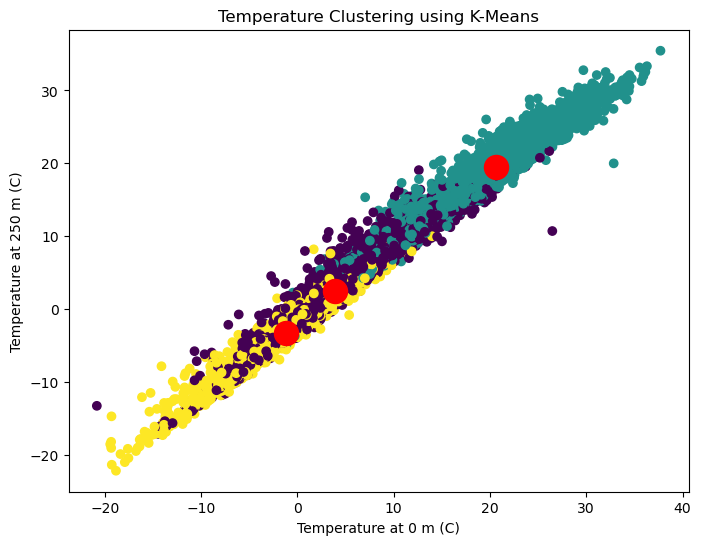

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X.values[:, 0], X.values[:, 1], c=kmeans_labels, cmap='viridis')

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')

plt.xlabel('Temperature at 0 m (C)')
plt.ylabel('Temperature at 250 m (C)')
plt.title('Temperature Clustering using K-Means')

### A few bulk numerical metrics related to distances and clusters. 

First the inertia, which is the average of the in-cluster RMSE:

In [9]:
inertia = kmeans.inertia_
print("Inertia Score (K-Means):", inertia)

Inertia Score (K-Means): 38711.739377528516


The Dunn Index is a clustering quality metric that balances the compactness of clusters and the separation between them. It is calculated as the ratio of the minimum intercluster distance to the maximum intracluster diameter. A higher Dunn Index indicates better cluster quality, with more compact and well-separated clusters.

In [10]:
# Choose the number of clusters using the Dunn Index
def dunn_index(X, labels):
    cluster_centers = [np.mean(X[labels == label], axis=0) for label in np.unique(labels)]
    intra_cluster_distances = np.zeros((len(cluster_centers),))
    for i, center in enumerate(cluster_centers):
        samples = X[labels == i]
        intra_cluster_distances[i] = np.max(pairwise_distances(samples, [center]))
    inter_cluster_distances = pairwise_distances(cluster_centers)
    min_inter_cluster_distance = np.min(inter_cluster_distances[np.nonzero(inter_cluster_distances)])
    return min_inter_cluster_distance / np.max(intra_cluster_distances)

In [11]:
dunn = dunn_index(X_scaled, kmeans_labels)
print("Dunn Score (K-Means):", dunn)

Dunn Score (K-Means): 0.5692006531549433


The silhouette score measures how similar each data point in one cluster is to the other points in the same cluster compared to the nearest neighboring cluster. It ranges from -1 to 1, and a higher silhouette score indicates better-defined clusters. 

In [12]:
# Evaluate clustering quality using Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print("Silhouette Score (K-Means):", silhouette_kmeans)

Silhouette Score (K-Means): 0.4961646801793342


Others include:
    
Gap Statistics: Gap statistics compare the performance of your clustering algorithm to a random clustering. A larger gap statistic indicates that your algorithm is creating more distinct clusters than random. Calculate the gap statistic for different values of k and look for the value of k that maximizes the gap.

Davies-Bouldin Index: This index quantifies the average similarity between each cluster and its most similar one. A lower Davies-Bouldin index indicates better clustering. Compute this index for different k values and look for the minimum value.

Calinski-Harabasz Index: Also known as the Variance Ratio Criterion, it measures the ratio of between-cluster variance to within-cluster variance. A higher Calinski-Harabasz score indicates better clustering.

### Elbow plot to determine optimal cluster number

In [13]:
dunn_scores = []
inertia_values = []
silhouette_values = []
k_values = list(range(2, X.shape[-1]))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = "auto")
    kmeans_labels = kmeans.fit_predict(X_scaled)
    dunn = dunn_index(X_scaled, kmeans_labels)
    silhouette = silhouette_score(X_scaled, kmeans_labels)
    dunn_scores.append(dunn)
    inertia_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette)

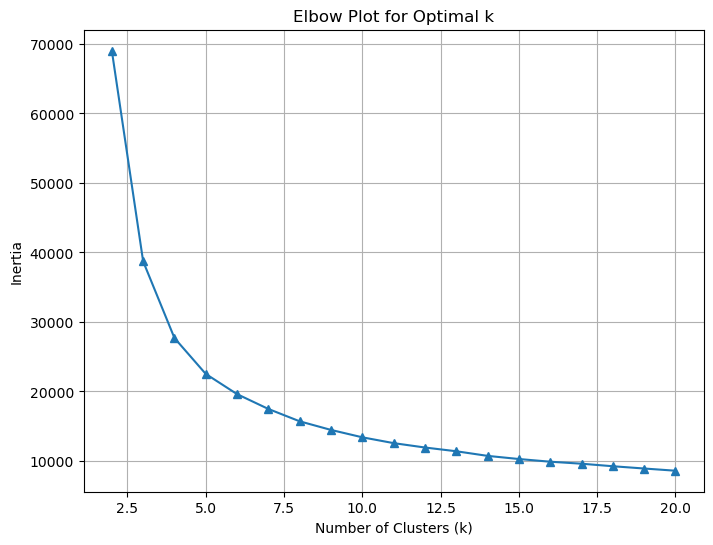

In [14]:
plt.figure(figsize=(8, 6))
#plt.plot(k_values, dunn_scores, marker='o')
plt.plot(k_values, inertia_values, marker='^')
#plt.plot(k_values, silhouette_values, marker='s')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
#plt.yscale("log")
plt.grid()
plt.show()

In [15]:
# !pip install yellowbrick

In [16]:
# from yellowbrick.cluster import KElbowVisualizer

# # Instantiate the KMeans model
# model = KMeans(random_state=42, n_init = "auto")

# # Use the KElbowVisualizer to plot the elbow curve for different k values
# visualizer = KElbowVisualizer(model, k=k_values, timings=False)

# # Fit the visualizer to your data
# visualizer.fit(X)

# # Visualize the elbow curve
# visualizer.show()

Hierarchical Clustering arranges data into a tree-like structure, where the top level is one big cluster, and as you move down, clusters split into smaller, more similar groups.

Linkage is crucial; it defines how cluster similarity is calculated:
Single Linkage: Compares the most similar data points, resulting in long, stringy clusters.
Complete Linkage: Compares the least similar data points, creating tight, spherical clusters.
Average Linkage: Averages all data point similarities between clusters.
Ward's Linkage: Minimizes variance within clusters, leading to balanced ones.

A Dendrogram visually represents hierarchical clustering, showing cluster formation and linkage:
Each leaf represents a data point.
Branch height shows dissimilarity.
Merging clusters lower in the dendrogram are more similar.
Dendrograms guide cluster number selection and reveal data point relationships. Cutting at a certain height determines cluster count.

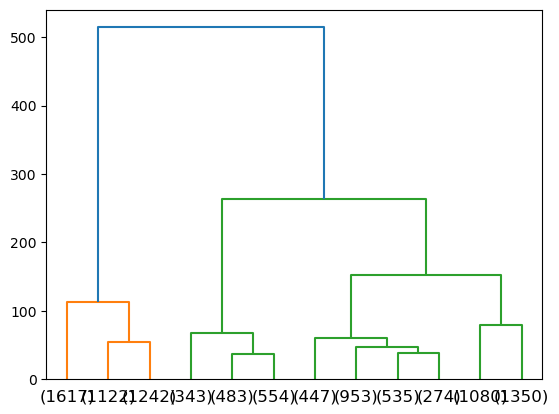

In [17]:
linkage_matrix = linkage(X_scaled, method='ward')
_ = dendrogram(linkage_matrix, truncate_mode='lastp', p=12)

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a technique for visualizing high-dimensional data in a 2D or 3D space. It helps us see how similar data points are to each other. It's great for identifying clusters and patterns in complex data, making it a valuable tool for data exploration and visualization. However, it doesn't preserve global structures well and is mainly used for visualization, not feature extraction.

In [18]:
from sklearn.manifold import TSNE

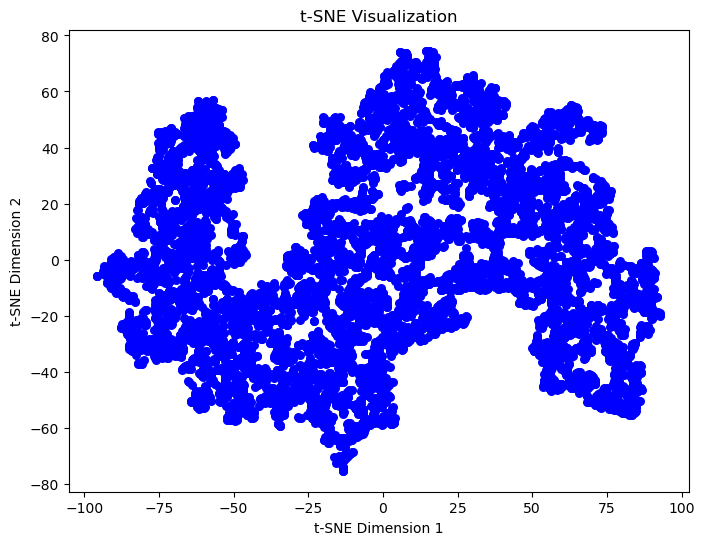

In [19]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='b', marker='o', s=30)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Down-stream evaluation

When unsupervised techniques are used to create a reduced number of features for use as inputs to an ML model, standard supervised learning methods can be used to effectively gauge performance of the cluster-technique selected. 